<h1 align="center"> Homework 7 Programming Task</h1>
<h3 align="center"> IST 5520, 2022 Fall </h3>
<h3 align="center"> Student: Ronald Adomako </h3>

# **Instruction:**

Complete the following tasks and type your answers to questions directly on the jupyter notebook (1 point for each task and question, 13 points in total). You can add additional code lines if necessary.

In [89]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Task: Principal Component Analysis of the Wine Dataset

(1) Load Wine Dataset

The data file 'wine.data' is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The first column is the class of the wine, other columns are attributes of the wine. These columns are:

- 1) Class
- 2) Alcohol
- 3) Malic acid
- 4) Ash
- 5) Alcalinity of ash
- 6) Magnesium
- 7) Total phenols
- 8) Flavanoids
- 9) Nonflavanoid phenols
- 10) Proanthocyanins
- 11) Color intensity
- 12) Hue
- 13) OD280/OD315 of diluted wines
- 14) Proline

For detailed description of the dataset, refer to https://archive.ics.uci.edu/ml/datasets/Wine.

Create a pandas DataFrame from the data file. The data file itself does not include column names, so you need to manually set the column names for your DataFrame. Then show information of the dataset.

Tip: Set the header parameter of the pd.read_csv() function correctly so that the first row will not be treated as column header.

In [90]:
#pd.read_csv?

In [102]:
column = [
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines/',
    'Proline']

df = pd.read_csv('wine.data',header = None)
df.columns = column
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines/,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**Question 1**: How many observations are in the dataset? Does the dataset contain missing values?

Your Answer: 


#### Solution
- Number of Instances: 178
- Missing Values? No



In [103]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines/,Proline
count,178.00...,178.00...,178.00...,178.00...,178.00...,178.00...,178.00...,178.00...,178.00...,178.00...,178.00...,178.00...,178.00...,178.00...
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.89...
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.90...
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.00...
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.50...
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.50...
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.00...,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.00...
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.00...,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.0...


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Class                          178 non-null    int64  
 1   Alcohol                        178 non-null    float64
 2   Malic acid                     178 non-null    float64
 3   Ash                            178 non-null    float64
 4   Alcalinity of ash              178 non-null    float64
 5   Magnesium                      178 non-null    int64  
 6   Total phenols                  178 non-null    float64
 7   Flavanoids                     178 non-null    float64
 8   Nonflavanoid phenols           178 non-null    float64
 9   Proanthocyanins                178 non-null    float64
 10  Color intensity                178 non-null    float64
 11  Hue                            178 non-null    float64
 12  OD280/OD315 of diluted wines/  178 non-null    flo

(2) Sample observations

Randomly select 5 obvervations from the dataset and show them below.

In [105]:
df.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines/,Proline
139,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600
114,2,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385
103,2,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
90,2,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480


(3) Convert the value of Class variable

Convert Class integer values into strings by using the following mapping:

- 1: 'Class 1'
- 2: 'Class 2'
- 3: 'Class 3'

In [106]:
#pd.set_option('display.max_colwidth', 20)
#pd.set_option('display.width', 20)
#df[column[0]] = 'Class' + ' ' + df[column[0]].astype(str)
df['Class'] = 'Class' + ' ' + df['Class'].astype(str)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines/,Proline
0,Class 1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,Class 1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,Class 1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,Class 1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,Class 1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(4) Normalize dataset

Standardize all columns except Class so that these columns have mean = 0 and standard error = 1.

In [111]:
dataNorm = scale(df.loc[:,'Alcohol':])
dataNorm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [117]:
pd.DataFrame(dataNorm, columns = column[1:]).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,-8.6198...,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
Malic acid,178.0,-8.3578...,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
Ash,178.0,-8.6572...,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
Alcalinity of ash,178.0,-1.1601...,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
Magnesium,178.0,-1.9959...,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
Total phenols,178.0,-2.9720...,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
Flavanoids,178.0,-4.0167...,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
Nonflavanoid phenols,178.0,4.0791...,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
Proanthocyanins,178.0,-1.6996...,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
Color intensity,178.0,-1.1226...,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


(5) Principal component analysis with full components

In [170]:
df_norm = pd.DataFrame(dataNorm, columns = column[1:])
df_norm.corr()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines/,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [121]:
pca1 = PCA(n_components = 13)
pca1.fit(dataNorm)

PCA(n_components=13)

In [123]:
var = pca1.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

(6) Draw a scree plot to show the cumulative variance explained along the number of principal components.

In [126]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

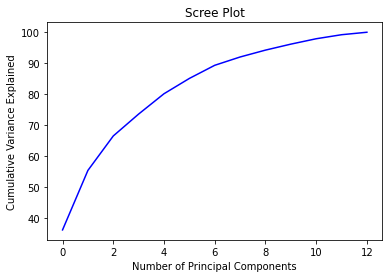

In [129]:
plt.plot(var1,color='blue');
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('Scree_plot.png',dpi=100, bbox_inches='tight')

**Question 2**: What is the least number of components we need to keep in order to keep 90% variance of the original predictors?

Your answer: 


#### solution:

##### 8

(7) Principal component analysis with two componenets.

In [130]:
pca2 = PCA(n_components = 2)
pca2.fit(dataNorm)

PCA(n_components=2)

In [131]:
var2 = pca2.explained_variance_ratio_
var2

array([0.36198848, 0.1920749 ])

In [162]:
dataPCA2 = pca2.transform(dataNorm)

df_dataPCA2 = pd.DataFrame(dataPCA2)
df_dataPCA2.columns = [f'PC{i+1}' for i in range(len(var2))]

#Show the dataframe
df_dataPCA2.head(10)

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
5,3.050254,-2.122401
6,2.449090,-1.174850
7,2.059437,-1.608963
8,2.510874,-0.918071
9,2.753628,-0.789438


(8) Run a correlation analysis on the dimension-reduced dataset.

In [169]:
pd.set_option('display.max_colwidth', 20)
df_dataPCA2.corr()

,PC1,PC2
PC1,1.000000e+00,-1.804994e-16
PC2,-1.804994e-16,1.000000e+00


In [138]:
pca8 = PCA(n_components = 8)
pca8.fit(dataNorm)
dataPCA8 = pca8.transform(dataNorm)

df_dataPCA8 = pd.DataFrame(dataPCA8)

In [168]:
#Show parital component analysis
var8 = pca8.explained_variance_ratio_

#Set max column width to see zeroes
pd.set_option('display.max_colwidth', 20)
df_dataPCA8.columns = [f'PC{i+1}' for i in range(len(var8))]
df_dataPCA8.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
PC1,1.000000e+00,-2.096123e-16,2.104064e-16,2.363447e-16,1.643511e-16,-2.663322e-16,6.142855e-17,-4.324983e-16
PC2,-2.096123e-16,1.000000e+00,1.221044e-16,-2.017566e-16,3.589467e-17,3.710451e-16,-2.542032e-16,1.738429e-17
PC3,2.104064e-16,1.221044e-16,1.000000e+00,-1.882881e-16,1.094958e-16,4.396566e-16,4.806705e-16,9.620766e-17
PC4,2.363447e-16,-2.017566e-16,-1.882881e-16,1.000000e+00,2.042697e-17,-4.609492e-17,-3.377159e-16,1.981106e-16
PC5,1.643511e-16,3.589467e-17,1.094958e-16,2.042697e-17,1.000000e+00,1.268652e-16,-4.328121e-16,-1.761484e-16
PC6,-2.663322e-16,3.710451e-16,4.396566e-16,-4.609492e-17,1.268652e-16,1.000000e+00,1.422116e-16,-1.422852e-16
PC7,6.142855e-17,-2.542032e-16,4.806705e-16,-3.377159e-16,-4.328121e-16,1.422116e-16,1.000000e+00,2.611047e-16
PC8,-4.324983e-16,1.738429e-17,9.620766e-17,1.981106e-16,-1.761484e-16,-1.422852e-16,2.611047e-16,1.000000e+00


In [165]:
pca8.components_[[0]]

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223]])

In [166]:
#Verification: manually calculate first compononent score
np.dot( dataNorm, pca8.components_[[0]].reshape(len(dataNorm[0]),1) )[:10]

array([[3.31675081],
       [2.20946492],
       [2.51674015],
       [3.75706561],
       [1.00890849],
       [3.05025392],
       [2.44908967],
       [2.05943687],
       [2.5108743 ],
       [2.75362819]])

**Question 3**: What conclusion do you get from the correlation analysis?

Your answer:


#### solution

The principal components are orthogonal. Every component, along the diagonals, is perfectly correlated with itself but all others are uncorrelated. Off diagonals are ~0. Principal components are orthogonal to one another.

(9) Plot wine class onto the reduced two-dimensional space.

With the two-component solution, draw a scatter plot to show the reduced dataset. Actually, one popular use of PCA is to reduce dimension to two, thus allowing plot a multi-dimensional data on a 2D space.

The scatter plot should use "Principal Component 1" as x axis, "Principal Component 2" as y axis. Use different colors to represent points for different classes of the wine.

A sample scatter plot can be found here:
https://github.com/chenla-mst/datascience/blob/master/HW7_2D_plot.png

You can refer to "Data Summarization and Visualization" jupyter notebook section 4.6 for scatter plot.

#### solution

/opt/anaconda3/envs/MyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/MyEnv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


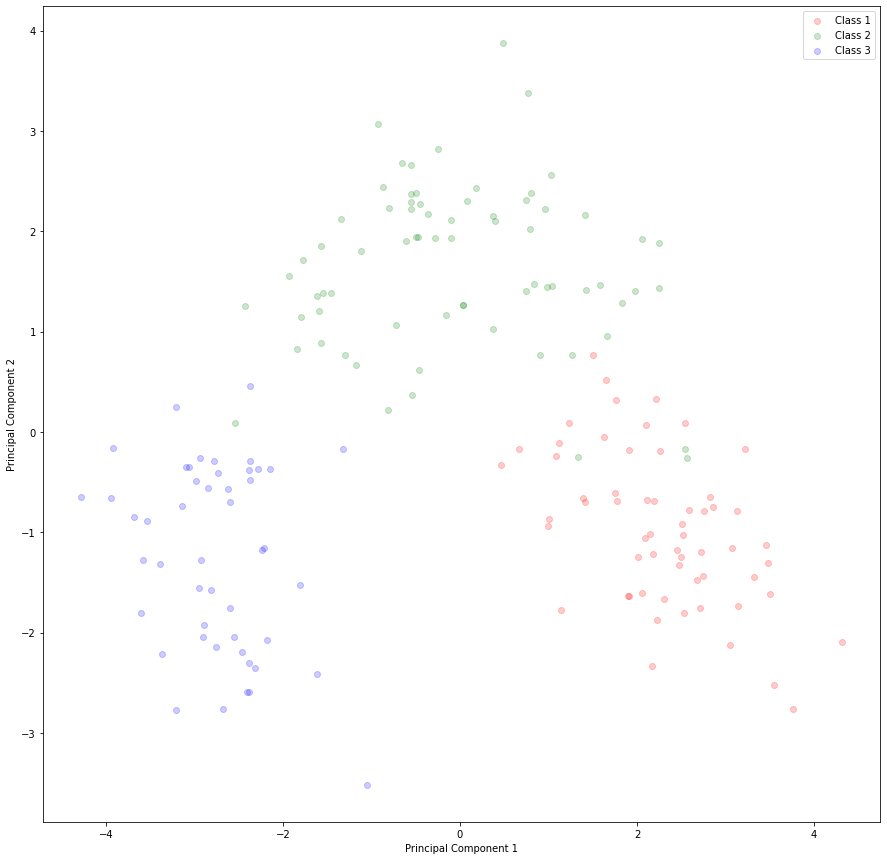

In [227]:
fig, ax = plt.subplots(figsize=(15,15))
#ax.scatter(df_dataPCA2['PC1'],df_dataPCA2['PC2'])


c_scheme = {'Class 1':'r', 'Class 2':'g', 'Class 3':'b'}

d = df[['Class']]
d['PC1'] = df_dataPCA2[['PC1']]
d['PC2'] = df_dataPCA2[['PC2']]

for c, dff in d.groupby('Class'): 
    #print(i)
    ax.scatter(dff[['PC1']], 
               dff[['PC2']],
               c=c_scheme[c],
               label = c,
               alpha=0.2)

ax.legend()    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig('2D_plot_legend.png', dpi=300, bbox_inches='tight')
#ax.annotate(2,(0,0))
# for i in np.arange(0,len(df)):
#     ax.annotate(df.Class[i],(df_dataPCA2.loc[i,'PC1']-0.1, df_dataPCA2.loc[i,'PC2']+0.1))    
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.savefig('2D_plot.png', dpi=300, bbox_inches='tight')


**Question 4**: According to the scatter plot shown above, are these two principal components good predictors for classifying wine class? Explain why.

Your answer:


#### solution:

Yes! These two principal components are very good. Although the full component analysis show that the first two components have a cumulative variance explained of 55.41%, the cluster analysis is very accurate! We see that for three target classes we can almost cleanly separate the classes with the two primary classes. Class 2 overlaps slightly with Class 1 and Class 3, but Class 1 and Class 3 are completely separated.